In [1]:
# Data manipulation
import pandas as pd # data manipulation and dataframes
import numpy as np # arrays manipulation and mathematical operations

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Datetime
from datetime import datetime

# Te quiero demasiado
from tqdm import tqdm

In [30]:
# Reads csvs
initial = pd.read_csv('../eda/initial.csv', index_col = 0)
scraped = pd.read_csv('../eda/scraped.csv', index_col = 0)

scraped['hue'] = 'scraped'
initial['hue'] = 'initial'

frames = [initial, scraped]
concatenation = pd.concat(frames)

unique_dates = concatenation['insert_date'].unique();
unique_categories = concatenation['category'].unique();


In [3]:
initial.head(1) #2021-03-06

,url,supermarket,category,name,price,reference_price,reference_unit,insert_date
0,https://www.dia.es/compra-online/productos/per...,dia-es,perfumeria_higiene_salud,FLEX champú con Keratina para cabello normal f...,3.39,5.22,l,2021-03-06


In [4]:
initial.tail(1) #2022-08-18

,url,supermarket,category,name,price,reference_price,reference_unit,insert_date
3053472,https://www.dia.es/compra-online/despensa/desa...,dia-es,galletas_bollos_y_cereales,REGLERO pastas artesanas estuche 400 gr,4.29,10.73,kg,2022-08-18


In [7]:
scraped.head(1)

,url,supermarket,category,name,price,reference_price,reference_unit,insert_date
0,NaN,dia-es,charcuteria_y_quesos,Pechuga de pavo NUESTRA ALACENA pack 2 unidade...,3.55,8.88,kg,2023-07-10


In [10]:
initial.isnull().sum()
initial.dropna(axis=0, inplace=True)

In [14]:
mean_21_22 = sum(initial['price']) / len(initial['price'])

In [15]:
mean_23 = sum(scraped['price']) / len(scraped['price'])

In [16]:
mean_23 / mean_21_22

1.002338701330084

In [17]:
mean_price_evolution = {'dates': [], 'mean_prices': []}

for d in tqdm(unique_dates):
    mean_price_evolution['dates'].append(d)
    mean_price_evolution['mean_prices'].append(concatenation[concatenation['insert_date'] == d]['price'].mean())

100%|██████████| 532/532 [01:44<00:00,  5.10it/s]


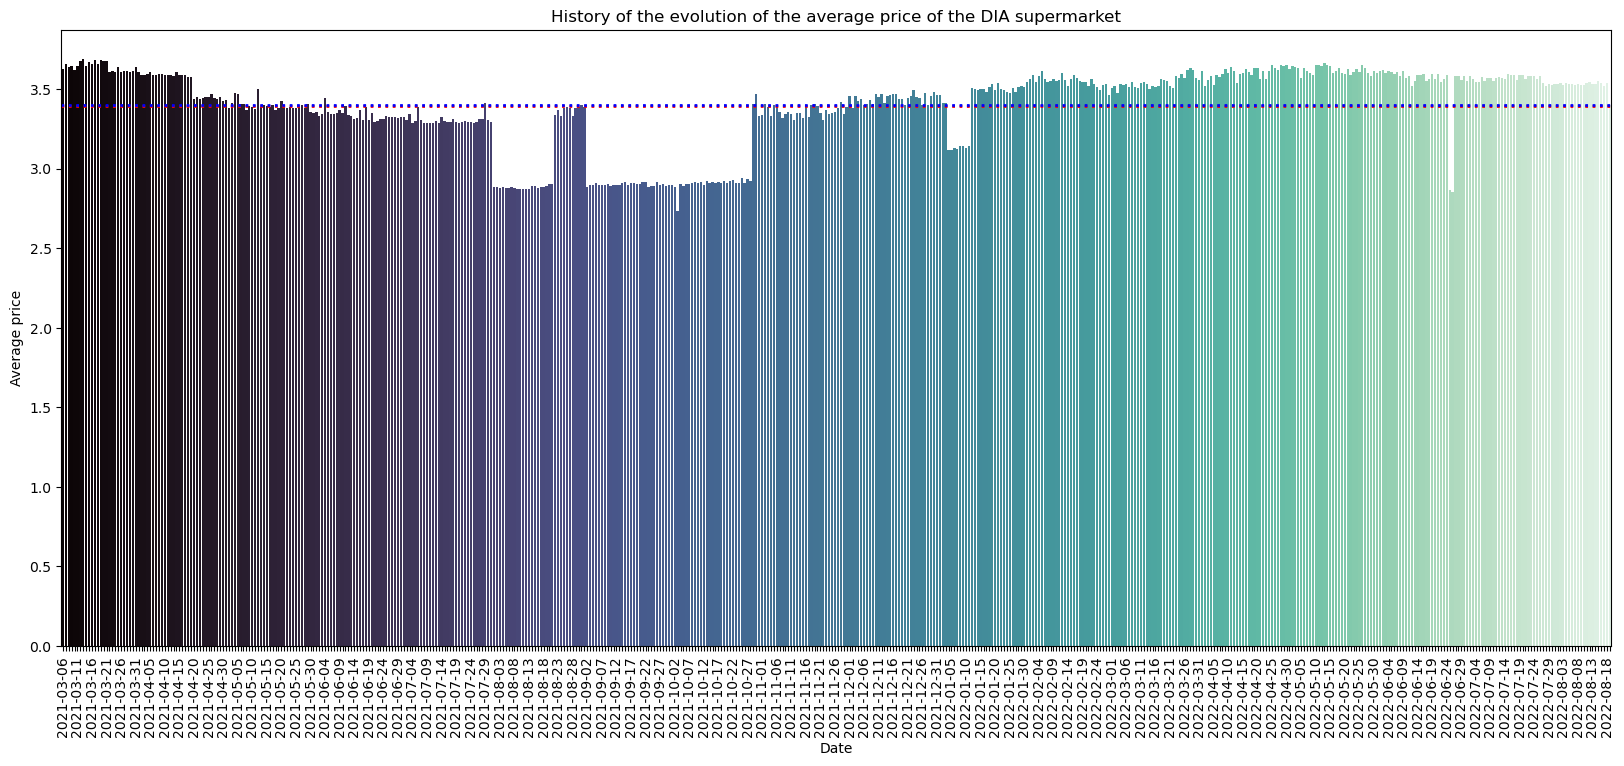

In [18]:
plt.figure(figsize =(20,8))

bar_plot = sns.barplot(x = mean_price_evolution['dates'], y = mean_price_evolution['mean_prices'], palette= "mako")

plt.title('History of the evolution of the average price of the DIA supermarket')
plt.xlabel('Date')
plt.ylabel('Average price')
plt.xticks(rotation=90);

plt.axhline(mean_21_22, color='red', linewidth=2, linestyle='dotted')
plt.axhline(mean_23, color='blue', linewidth=2, linestyle='dotted')

for index, label in enumerate(bar_plot.get_xticklabels()):
   if index % 5 == 0:
      label.set_visible(True)
   else:
      label.set_visible(False)
plt.show()

In [ ]:
sns.barplot(concatenation, 
            x = 'category', 
            y = 'Count',
            hue = 'Sex')

In [31]:
mean_price_by_categories = {'categories': [], 'mean_prices': []}

for c in tqdm(unique_categories):
    mean_price_by_categories['categories'].append(c)
    mean_price_by_categories['mean_prices'].append(concatenation[concatenation['category'] == c]['price'].mean())

100%|██████████| 26/26 [00:05<00:00,  5.16it/s]


In [37]:
mean_price_by_categories

{'categories': ['perfumeria_higiene_salud',
  'cervezas_vinos_y_bebidas_con_alcohol',
  'bebe',
  'solidario',
  'limpieza_y_hogar',
  'panes_harinas_y_masas',
  'pescados_mariscos_y_ahumados',
  'verduras',
  'charcuteria_y_quesos',
  'aceites_salsas_y_especias',
  'patatas_fritas_encurtidos_y_frutos_secos',
  'conservas_caldos_y_cremas',
  'arroz_pastas_y_legumbres',
  'pizzas_y_platos_preparados',
  'mascotas',
  'agua_refrescos_y_zumos',
  'congelados',
  'leche_huevos_y_mantequilla',
  'carniceria',
  'galletas_bollos_y_cereales',
  'frutas',
  'cafe_cacao_e_infusiones',
  'azucar_chocolates_y_caramelos',
  'yogures_y_postres',
  'internacional',
  'navidad'],
 'mean_prices': [4.553563670649869,
  4.967957060031111,
  4.800689561320801,
  2.8390570719602977,
  3.2654626779530593,
  1.756382982536312,
  4.945456671187392,
  1.465266157821036,
  5.241368444493932,
  2.386084337891733,
  1.6315500770962195,
  2.111836630097518,
  1.6012216510432415,
  2.606751037506852,
  3.937536042

In [38]:
df = concatenation.groupby(['category', 'hue']).mean()['price'].reset_index()

df.columns = ['category', 'hue', 'price']

sns.barplot(df, 
            x = 'category', 
            y = 'price',
            hue = 'hue')

KeyboardInterrupt: 

In [35]:
plt.figure(figsize =(20,8))

sns.barplot(x = mean_price_by_categories['categories'], y = mean_price_by_categories['mean_prices'], hue = 'hue', palette= "mako")

plt.title('Average price by category')
plt.xlabel('Category')
plt.ylabel('Average price')
plt.xticks(rotation=90);

ValueError: Could not interpret input 'hue'

<Figure size 2000x800 with 0 Axes>

In [36]:
concatenation

,url,supermarket,category,name,price,reference_price,reference_unit,insert_date,hue
0,https://www.dia.es/compra-online/productos/per...,dia-es,perfumeria_higiene_salud,FLEX champú con Keratina para cabello normal f...,3.39,5.22,l,2021-03-06,0
1,https://www.dia.es/compra-online/productos/per...,dia-es,perfumeria_higiene_salud,FLEX champú con Keratina fortificante frasco 6...,3.39,5.22,l,2021-03-06,1
2,https://www.dia.es/compra-online/productos/per...,dia-es,perfumeria_higiene_salud,GLISS champú reparador total frasco 250 ml,2.99,11.96,l,2021-03-06,2
3,https://www.dia.es/compra-online/productos/per...,dia-es,perfumeria_higiene_salud,GLISS champú reparador ultimate frasco 250 ml,2.99,11.96,l,2021-03-06,3
4,https://www.dia.es/compra-online/productos/per...,dia-es,perfumeria_higiene_salud,NATUR VITAL champú protección color cabellos c...,3.99,13.30,l,2021-03-06,4
...,...,...,...,...,...,...,...,...,...
6113,NaN,dia-es,mascotas,Finas láminas surtidas en salsa para gatos GOU...,3.79,11.15,kg,2023-07-10,6113
6114,NaN,dia-es,mascotas,Alimento para gatos esterilizados rico en buey...,5.69,7.11,kg,2023-07-10,6114
6115,NaN,dia-es,mascotas,Barritas para roedores de verdura y fruta BIOZ...,1.79,15.98,kg,2023-07-10,6115
6116,NaN,dia-es,mascotas,Barritas con fruta para canarios BIAZOO BOLS...,1.49,24.83,kg,2023-07-10,6116
